## WEEK 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
tcs = pd.read_csv("tcs.csv")
rel = pd.read_csv("Reliance.csv")
hdfc = pd.read_csv("HDFCBANK.NS.csv")
sbi = pd.read_csv("SBI Dataset.csv")

In [8]:
tcs.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2013-04-29,682.50,692.349976,682.500000,685.375000,555.524414,3968916,0.0,0.0
1,2013-04-30,684.00,691.000000,682.500000,689.200012,558.624695,4020570,0.0,0.0
2,2013-05-02,686.75,719.400024,686.750000,716.950012,581.117065,5630326,0.0,0.0
3,2013-05-03,713.00,723.625000,703.950012,709.250000,574.875916,3641790,0.0,0.0
4,2013-05-06,710.00,736.200012,710.000000,733.599976,594.612488,3727118,0.0,0.0


In [9]:
rel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [10]:
hdfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,2.417746,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,2.413689,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,2.421803,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,2.405575,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,2.401519,189000.0


In [11]:
sbi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,22.267092,22.988886,22.101974,22.988886,15.844801,25152894.0
1,04-01-2000,22.988886,24.720245,22.535995,24.446625,16.849524,47648560.0
2,05-01-2000,23.493668,24.974997,23.116261,23.441774,16.156942,36396207.0
3,06-01-2000,23.776726,25.286358,23.776726,24.625893,16.973083,70573968.0
4,07-01-2000,24.673071,26.409147,24.059780,25.786425,17.772966,83453217.0


In [12]:
for df in [tcs, rel, hdfc, sbi]:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.sort_values('Date', inplace=True)


C:\Users\Sumit Sharma\AppData\Local\Temp\ipykernel_22280\3298541933.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
C:\Users\Sumit Sharma\AppData\Local\Temp\ipykernel_22280\3298541933.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [13]:
for name, df in zip(['TCS','Reliance','HDFC','SBI'], [tcs, rel, hdfc, sbi]):
    print(name)
    print(df.isna().sum())


TCS
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Reliance
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
HDFC
Date         3977
Open            7
High            7
Low             7
Close           7
Adj Close       7
Volume          7
dtype: int64
SBI
Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64


In [14]:
def keep_price(df):
    if 'Adj Close' in df.columns:
        return df[['Date', 'Adj Close']].rename(columns={'Adj Close':'Price'})
    else:
        return df[['Date', 'Close']].rename(columns={'Close':'Price'})

tcs = keep_price(tcs)
rel = keep_price(rel)
hdfc = keep_price(hdfc)
sbi = keep_price(sbi)


In [15]:
for name, df in zip(['TCS','Reliance','HDFC','SBI'], [tcs, rel, hdfc, sbi]):
    print(name)
    print(df.isna().sum())


TCS
Date     0
Price    0
dtype: int64
Reliance
Date     0
Price    1
dtype: int64
HDFC
Date     3977
Price       7
dtype: int64
SBI
Date     0
Price    9
dtype: int64


In [16]:
tcs.dropna(inplace=True)
rel.dropna(inplace=True)
hdfc.dropna(inplace=True)
sbi.dropna(inplace=True)


In [17]:
portfolio = tcs.merge(rel, on='Date', how='inner', suffixes=('_TCS','_REL'))
portfolio = portfolio.merge(hdfc, on='Date', how='inner')
portfolio = portfolio.merge(sbi, on='Date', how='inner')

portfolio.columns = ['Date','TCS','Reliance','HDFC','SBI']

portfolio.head()


,Date,TCS,Reliance,HDFC,SBI
0,2015-12-01,1018.336182,462.478699,463.920502,230.362946
1,2015-12-02,1019.759094,468.248291,516.186890,225.206940
2,2015-12-03,1013.528931,467.889160,505.920654,221.984436
3,2015-12-08,1004.151306,450.508545,517.384094,217.242767
4,2015-12-10,1028.102173,455.033234,522.265808,213.559891


In [18]:
portfolio.info()
portfolio.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      343 non-null    datetime64[ns]
 1   TCS       343 non-null    float64       
 2   Reliance  343 non-null    float64       
 3   HDFC      343 non-null    float64       
 4   SBI       343 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 13.5 KB


,Date,TCS,Reliance,HDFC,SBI
count,343,343.000000,343.000000,343.000000,343.000000
mean,2018-05-24 16:05:35.860058368,1546.212843,1030.858602,909.912207,245.157642
min,2015-12-01 00:00:00,922.371155,434.061554,463.920502,142.020325
25%,2017-02-18 12:00:00,1090.984436,573.253907,655.687012,211.677574
50%,2018-06-07 00:00:00,1570.403809,961.862244,960.190979,250.319138
75%,2019-08-01 12:00:00,1919.842834,1293.772461,1086.572327,278.387146
max,2020-11-12 00:00:00,2695.005615,2319.750000,1400.886963,348.872192
std,NaN,459.839482,471.601655,241.883975,45.684805


## WEEK 2

In [19]:
import numpy as np

prices = portfolio[['TCS','Reliance','HDFC','SBI']]

log_returns = np.log(prices / prices.shift(1))

log_returns.head()


,TCS,Reliance,HDFC,SBI
0,NaN,NaN,NaN,NaN
1,0.001396,0.012398,0.106756,-0.022636
2,-0.006128,-0.000767,-0.020089,-0.014412
3,-0.009296,-0.037854,0.022406,-0.021592
4,0.023572,0.009993,0.009391,-0.017098


In [20]:
volatility = log_returns.std()

volatility

TCS         0.029863
Reliance    0.036514
HDFC        0.116842
SBI         0.043301
dtype: float64

In [21]:
rolling_vol = log_returns.rolling(window=30).std()

rolling_vol


,TCS,Reliance,HDFC,SBI
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
338,0.027302,0.051967,0.129575,0.033603
339,0.027251,0.052236,0.128746,0.033606
340,0.026728,0.051911,0.127861,0.031447
341,0.027072,0.047729,0.136201,0.032565


In [22]:
VaR_95 = log_returns.quantile(0.05)

VaR_95


TCS        -0.039356
Reliance   -0.042212
HDFC       -0.201192
SBI        -0.065635
Name: 0.05, dtype: float64

In [23]:
weights = np.array([0.25,0.25,0.25,0.25])


In [24]:
mean_returns = log_returns.mean()
cov_matrix = log_returns.cov()


In [25]:
num_simulations = 5000
num_days = 252   # 1 trading year

results = np.zeros((num_days, num_simulations))

for i in range(num_simulations):
    simulated_returns = np.random.multivariate_normal(
        mean_returns, cov_matrix, num_days
    )
    portfolio_path = np.cumprod(1 + simulated_returns.dot(weights))
    results[:, i] = portfolio_path


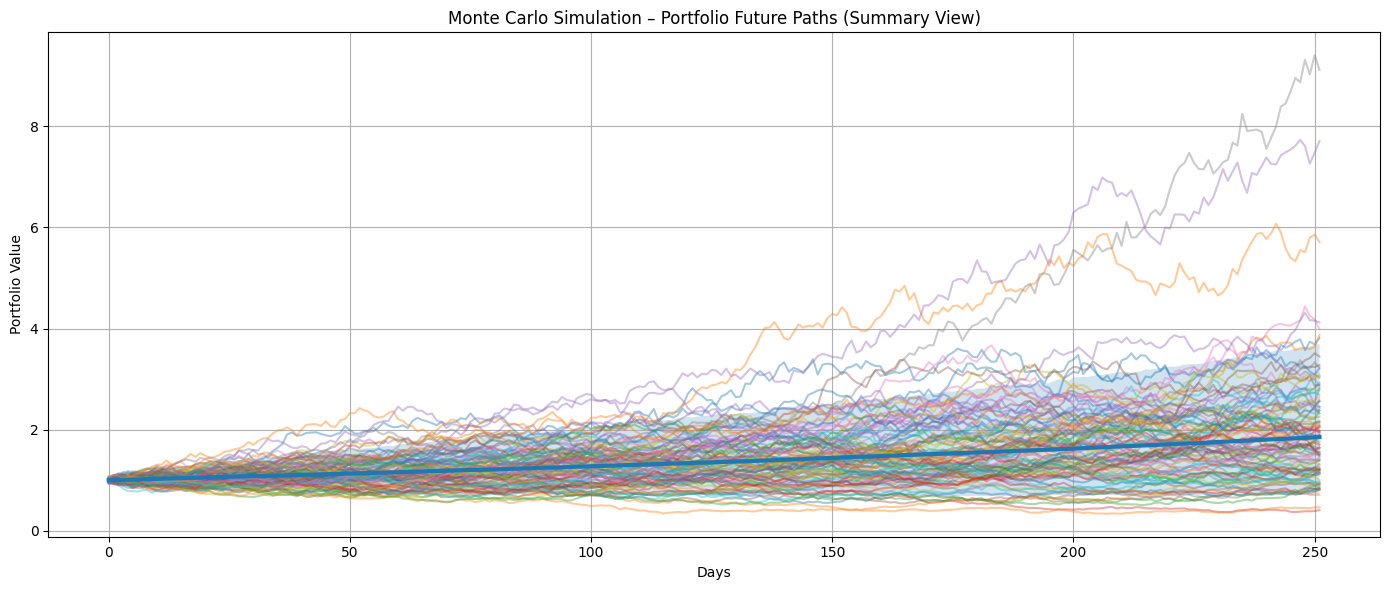

In [26]:
plt.figure(figsize=(14,6))

# Plot only first 100 paths for clarity
plt.plot(results[:, :100], alpha=0.4)

# Mean path
mean_path = results.mean(axis=1)
plt.plot(mean_path, linewidth=3)

# Percentile bands
p5 = np.percentile(results, 5, axis=1)
p95 = np.percentile(results, 95, axis=1)

plt.fill_between(range(num_days), p5, p95, alpha=0.2)

plt.title("Monte Carlo Simulation – Portfolio Future Paths (Summary View)")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
portfolio.to_csv("portfolio_prices.csv", index=False)
log_returns.to_csv("portfolio_log_returns.csv", index=False)
rolling_vol.to_csv("portfolio_rolling_volatility.csv", index=False)
VaR_95.to_csv("portfolio_VaR95.csv")

In [29]:
rolling_vol_export = rolling_vol.copy()
rolling_vol_export["Date"] = portfolio["Date"]

rolling_vol_export.to_csv("portfolio_rolling_volatility.csv", index=False)


In [30]:
log_returns_export = log_returns.copy()
log_returns_export["Date"] = portfolio["Date"]

log_returns_export.to_csv("portfolio_log_returns.csv", index=False)


In [31]:
VaR_95_export = VaR_95.reset_index()
VaR_95_export.columns = ["Stock", "VaR_95"]

VaR_95_export.to_csv("portfolio_VaR95.csv", index=False)


## WEEk 4


In [32]:
prices = pd.read_csv("portfolio_prices.csv")


prices["Date"] = pd.to_datetime(prices["Date"])
prices.set_index("Date", inplace=True)

stocks = ["TCS", "Reliance", "HDFC", "SBI"]

prices = prices[stocks]

prices.head()

,TCS,Reliance,HDFC,SBI
Date,,,,
2015-12-01,1018.336182,462.478699,463.920502,230.362946
2015-12-02,1019.759094,468.248291,516.186890,225.206940
2015-12-03,1013.528931,467.889160,505.920654,221.984436
2015-12-08,1004.151306,450.508545,517.384094,217.242767
2015-12-10,1028.102173,455.033234,522.265808,213.559891


In [33]:
prices = pd.read_csv("portfolio_prices.csv")


prices["Date"] = pd.to_datetime(prices["Date"])
prices.set_index("Date", inplace=True)

stocks = ["TCS", "Reliance", "HDFC", "SBI"]

prices = prices[stocks]

prices.head()

,TCS,Reliance,HDFC,SBI
Date,,,,
2015-12-01,1018.336182,462.478699,463.920502,230.362946
2015-12-02,1019.759094,468.248291,516.186890,225.206940
2015-12-03,1013.528931,467.889160,505.920654,221.984436
2015-12-08,1004.151306,450.508545,517.384094,217.242767
2015-12-10,1028.102173,455.033234,522.265808,213.559891


In [35]:
returns = prices.pct_change().dropna()
returns.head()


,TCS,Reliance,HDFC,SBI
Date,,,,
2015-12-02,0.001397,0.012475,0.112662,-0.022382
2015-12-03,-0.006109,-0.000767,-0.019889,-0.014309
2015-12-08,-0.009252,-0.037147,0.022659,-0.021360
2015-12-10,0.023852,0.010044,0.009435,-0.016953
2016-01-01,0.013357,0.068396,0.007589,-0.017892


In [36]:
mean_returns = returns.mean()
cov_matrix = returns.cov()

mean_returns, cov_matrix


(TCS         0.003141
 Reliance    0.004934
 HDFC        0.009765
 SBI         0.000719
 dtype: float64,
                TCS  Reliance      HDFC       SBI
 TCS       0.000912  0.000379 -0.000479  0.000106
 Reliance  0.000379  0.001383 -0.000960  0.000505
 HDFC     -0.000479 -0.000960  0.012474 -0.000277
 SBI       0.000106  0.000505 -0.000277  0.001929)

In [37]:
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))

    sharpe = portfolio_return / portfolio_vol

    results[0, i] = portfolio_return
    results[1, i] = portfolio_vol
    results[2, i] = sharpe

    weights_record.append(weights)

results_df = pd.DataFrame(results.T, columns=["Return", "Volatility", "Sharpe"])
weights_df = pd.DataFrame(weights_record, columns=stocks)

portfolios = pd.concat([results_df, weights_df], axis=1)

portfolios.head()


,Return,Volatility,Sharpe,TCS,Reliance,HDFC,SBI
0,1.007120,0.405335,2.484663,0.193685,0.493125,0.080670,0.232520
1,1.498185,0.700253,2.139492,0.424399,0.141991,0.397951,0.035659
2,0.775498,0.440412,1.760848,0.188783,0.419080,0.014875,0.377262
3,0.675082,0.447771,1.507651,0.196345,0.301092,0.023778,0.478786
4,1.327831,0.479004,2.772068,0.022541,0.739148,0.152541,0.085770


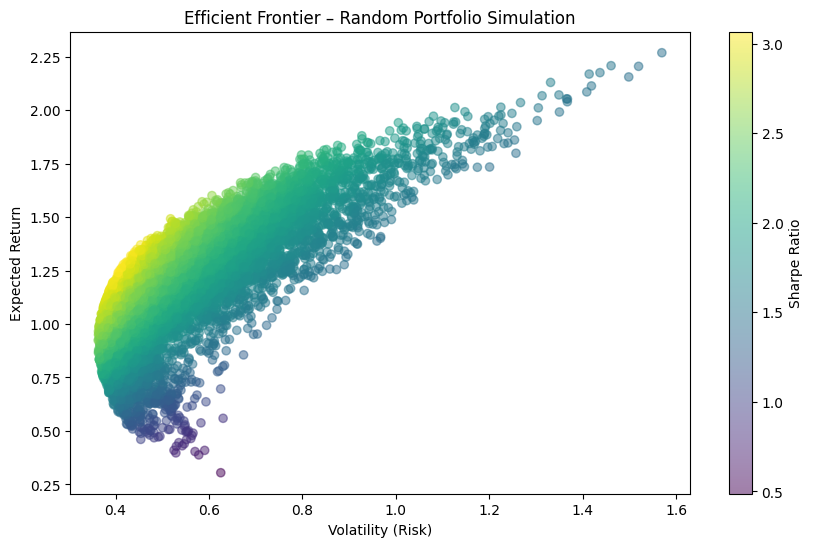

In [38]:
plt.figure(figsize=(10,6))

plt.scatter(
    portfolios["Volatility"],
    portfolios["Return"],
    c=portfolios["Sharpe"],
    cmap="viridis",
    alpha=0.5
)

plt.colorbar(label="Sharpe Ratio")

plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier – Random Portfolio Simulation")

plt.show()


In [39]:

max_sharpe = portfolios.loc[portfolios["Sharpe"].idxmax()]


min_vol = portfolios.loc[portfolios["Volatility"].idxmin()]

max_sharpe, min_vol


(Return        1.277269
 Volatility    0.416534
 Sharpe        3.066421
 TCS           0.356260
 Reliance      0.474884
 HDFC          0.164159
 SBI           0.004697
 Name: 3138, dtype: float64,
 Return        0.922926
 Volatility    0.362868
 Sharpe        2.543422
 TCS           0.514039
 Reliance      0.202506
 HDFC          0.093393
 SBI           0.190062
 Name: 2422, dtype: float64)

In [40]:
summary = pd.DataFrame({
    "Metric": ["Return", "Volatility", "Sharpe"],
    "Max Sharpe": [
        max_sharpe["Return"],
        max_sharpe["Volatility"],
        max_sharpe["Sharpe"]
    ],
    "Min Volatility": [
        min_vol["Return"],
        min_vol["Volatility"],
        min_vol["Sharpe"]
    ]
})

summary


,Metric,Max Sharpe,Min Volatility
0,Return,1.277269,0.922926
1,Volatility,0.416534,0.362868
2,Sharpe,3.066421,2.543422


In [41]:
summary.to_csv("week4_portfolio_summary.csv", index=False)
portfolios.to_csv("week4_all_portfolios.csv", index=False)


## Week-4 focused on portfolio optimization through Monte Carlo–style random weight simulation. The Efficient Frontier was generated to visualize the risk-return trade-off. The portfolio with the maximum Sharpe ratio and the minimum volatility portfolio were identified and summarized for investment decision-making.